# Motion of a carged particle in the field of a magnetic dipole.
## Numerically computing the orbits of electrons in a external dipolar magnetic field configuration.

The reference for this motion is: --Trapped Orbits in a Magnetic Dipole Field--, A. J. Dragt, Review of Geophysics, Vol. 3, Number 2, (1965), and --Global aspects of charged particle motion in axially symmetric multipole magnetic fields--, John V. Shebalin.

The charge particle Lagrangian for a field with azimuthal symmetry is given by:

\begin{equation}
\mathcal{L} = -mc^2\sqrt{1-v^2/c^2} + \frac{e}{c}A(r,\theta)r\sin{\theta} v^{\phi},
\end{equation}

where $A$ is the $z$ component of the vector potential. 
Recall that in these coordinates we have, $v^2 = \dot{r}^2 + r^2 \dot{\theta}^2 + r^2\sin^2(\theta) \dot{\phi}^2$.
It is convenient to redefine $A \to A/c$ $m=1$, $e \to e/m$, to get rid of irelevant parameters.

Since the Lagrangian does not depend on time the energy is conserved. For this case, without and electrostatic potential, it is given by:

\begin{equation}
H = \frac{c^2}{ \sqrt{1-v^2/c^2}} = \gamma c^2.
\end{equation}
Thus, the speed is conserved along the motion. On the other hand, the azimuthal symmetry also implies the particle angular momentum is also conserved, 

\begin{equation}
P := \frac{\partial \mathcal{L}}{\partial \dot{\phi}} = \frac{\dot{\phi} r^2 \sin^2{\theta} }{\sqrt{1-v^2/c^2} }+ e A(r,\theta) r \sin{\theta}  = \gamma \dot{\phi} r^2 \sin^2{\theta} + e A(r,\theta) r \sin{\theta}
\end{equation}

In spherical coordinates the complete system of equations becomes:

\begin{eqnarray*}
\frac{\partial \phi}{dt} &=& \frac{h}{\gamma r\sin{\theta}} \;\;\;\;\;\;\; h = [\frac{P}{r\sin{\theta}} - e A] \\
\frac{\partial \dot{r}}{dt} &=& e \frac{1}{ \gamma}\frac{\partial(rA)}{\partial r} \sin{\theta} \dot{\phi} + \frac{v^2 - \dot{r}^2}{r} \\
\frac{\partial \dot{\theta}}{dt} &=& [\frac{e}{\gamma} \frac{1}{r}\frac{\partial(\sin{\theta}A)}{\partial\theta} + \sin{\theta}\cos{\theta} \dot{\phi}]\dot{\phi} - 2\frac{\dot{r}}{r}\dot{\theta}
\end{eqnarray*}

Since the energy conservation implies the conservation of $v^2$, using the expression for the angular momentum we obtain,

\begin{equation}
v^2 = \dot{r}^2 + r^2 \dot{\theta}^2 + r^2 \sin^2{\theta} \dot{\phi}^2 \;\;\;\;\;  \dot{r}^2 + r^2 \dot{\theta}^2 = v^2 - \frac{h^2}{\gamma^2} .
\end{equation}

Therefore the movement is only possible when $h^2 = [\frac{P}{r\sin{\theta}} - e A]^2 < v^2\gamma^2$. For a generic multipole we have, 
\begin{equation}
A(r,\theta) = \frac{a_n}{r^{n+1}}P^1_n(\cos{\theta}).
\end{equation}


## The dipolar case.

For this case, $P^1_1(\cos{\theta}) = -\sin(\theta)$.

Defining $e a_1 = a_0$, 

\begin{eqnarray*}
\frac{\partial \phi}{dt} &=& \frac{h}{\gamma r\sin{\theta}} \;\;\;\;\;\;\; h = [\frac{P}{r\sin{\theta}} + \frac{a_0}{r^2}\sin{\theta} ] \\
\frac{\partial \dot{r}}{dt} &=&  \frac{1}{\gamma}\frac{a_0}{r^2} \sin^2{\theta} \dot{\phi} + \frac{v^2 - \dot{r}^2}{r} \\
\frac{\partial \dot{\theta}}{dt} &=& [- \frac{2a_0}{\gamma r^3} +  \dot{\phi}]\dot{\phi}\sin{\theta}\cos{\theta}  - 2\frac{\dot{r}}{r}\dot{\theta} 
\end{eqnarray*}

Where,
\begin{equation}
v^2 = \frac{\dot{r}^2 + r^2 \dot{\theta}^2 + h^2}{1+h^2},
\end{equation}
is constant along the motion.

Thus we only need to solve for $U = (r, \dot{r}, \theta, \dot{\theta})$, but we also solve along for $\phi$ so that we can easely plot the solutions. Thus our vector solution is:  $U = (r, \dot{r}, \theta, \dot{\theta}, \phi)$.

In [1]:
# Computa numericamente las orbitas de un electron en un campo magnetico externo de forma
# dipolar
#
import matplotlib as mpl
import numpy as np
import matplotlib
#matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
from scipy.integrate import ode
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

Here we put some of the parameters that enter the equations. 

For slow particles (simpler to evolve, but with all the complexity) $a = 0.1$, $pert = 0.01$, $T=6000-20000$, $Tol = 10^{-8}$. 

For faster particles (harder to evolve) $a = 1.0$, $pert = 0.1$, $T=200-400$, $Tol = 10^{-10}$. 

The fastest is $a = 10.0$, $pert = 0.8$, $T=10-20$, $Tol = 10^{-12}$. This is very hard for the integrator we are using. I recomment to play with the slowest one, it has a nicer structure.

In [26]:
a = 10.0  # field amplitude (reescaled with e, m and c)
#a = 0.1
p = -1. * a # angular momentum (reescaled with m and a). 
# With this value there is a part of h^2 < 1 which is disconected from the outside
#pert = 0.01 # this gives bounded orbits. This value enters in theta_dot, so it is de departure from plane orbits
#pert = 0.1
pert = 0.8 # for faster particles
# Integration time
#T_f = 600
T_f = 200
#T_f=2
# maximum step error on the integration
reltol=1e-8
#abstol=1e-8; # for slower
#reltol=1e-10
#abstol=1e-10; # for slower
#reltol=1e-12
abstol=1e-12; # for faster

Next we give the initial conditions. We start from the equatorial plane, at $r=1$. With no radial velocity. The off-plane velocity is small, and is given by the pert parameter. The $\phi$ velocity is obtained from the value of the given angular momentum. Thus, we know the total velocity after wards, and we need to check it is smaller that the speed of light!

In [27]:
# Primero las condiciones iniciales U=(rho,rho_t,theta, theta_t,phi)
N=5
T_0 = 0.
rho0 = 1.
#rho_t0 = -0.02
rho_t0 = -0.0
#pert = 0.000000000000000
pert = 0.8
theta0 = np.pi/2.0
theta_t0 = pert
phi0 = 0

h0 = (p/rho0/np.sin(theta0) + a*np.sin(theta0)/rho0/rho0)
h20 = h0*h0
v2 = (rho_t0*rho_t0 + rho0*rho0*(theta_t0*theta_t0) + h20) / (1.+h20)

if (v2 > 0.99):
    print('velocidad demasiado alta! v2=%f', v2)
    exit()
gamma = np.sqrt(1.-v2)                        

u0 = [rho0, rho_t0, theta0, theta_t0, phi0]

We now plot the regions $h^2 - 1 = constant = [\frac{P}{r\sin{\theta}} + \frac{a_0}{r^2}\sin{\theta} ]^2 - 1$ to see where are the bounded, and possible, propagation regions. Namely those regions for wich $h^2 - 1 < 0$ **Only in the Julia version**

In [28]:
# Luego definimos la funcion del integrador, o sea la ecuacion

def f(x, u):
    sint = np.sin(u[2])
    cost = np.cos(u[2])
    phi_t = (p/u[0]/sint + a/u[0]/u[0]*sint)/u[0]/sint/gamma
    
    return [u[1], a/u[0]/u[0]*sint*sint*phi_t/gamma + (v2 - u[1]*u[1])/u[0],u[3],
            (-2.*a/u[0]/u[0]/u[0]/gamma + phi_t)*phi_t*sint*cost - 2.*u[1]*u[3]/u[0],phi_t]

In [29]:
# Definimos cual integrador usar
# distintos tipos, para este problema que es muy sensible es recomendable usar la dop853, pero pruebe tambien la dopri5

#r = ode(f).set_integrator('zvode', method='bdf')
#r = ode(f).set_integrator('dopri5')  # Runge Kutta de orden 4/5
r = ode(f).set_integrator('dop853')   # Runge Kutta de orden 8
r.rtol = reltol

# Damos los valores iniciales

r.set_initial_value(u0, T_0)

# El valor final de integracion

#x1 = 10000 # con estos datos iniciales llegamos a y=0 para este valor de x
#T_f = 6000.
# Esto es solo a los fines de graficar, si da un error: out of bounds poner K mas grande
#K=50001
K=100000
#K=10000
dx=T_f/K
KK=0
U = np.zeros((K,N))
X = np.zeros(K)

# Integramos K veces separadas (para graficar)
i = 0
while r.successful() and r.t < T_f and r.y[0] < rho0*12.:
    r.integrate(r.t+dx)
    U[i,:] = r.y
    X[i] = r.t
    i=i+1
    KK=KK+1

    
    

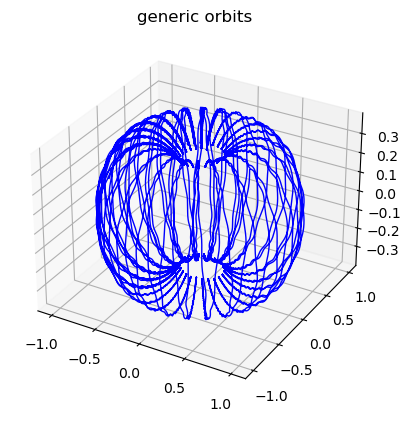

In [30]:
# Finalmente graficamos la solucion    

#ax = plt.subplot(111, projection='polar')
ax = plt.subplot(111, projection='3d')
#ax.plot(U[:,2],U[:,0], '.', color='r', linewidth=1)
#ax.plot(U[:,4],U[:,0], color='r', linewidth=1)
ax.plot(U[0:KK,0]*np.sin(U[0:KK,4])*np.sin(U[0:KK,2]),
        U[0:KK,0]*np.cos(U[0:KK,4])*np.sin(U[0:KK,2]),
        U[0:KK,0]*np.cos(U[0:KK,2]), color='b', linewidth=1)
#ax.set_rmax(6.10)
ax.grid(True)

ax.set_title("generic orbits", va='bottom')
plt.show()

#plt.plot(X[:],U[:,0])
#plt.show()
    
    
# MATE EL GRAFICO PARA CONTINUAR!

AttributeError: 'list' object has no attribute 'set_data'

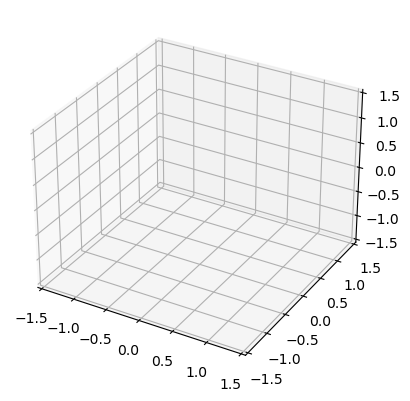

In [33]:
fig = plt.figure()
#ax1 = fig.add_subplot(111, projection='polar' )
#ax1.set_rmax(6.10)
#ax1.set_rmax(10.)
ax1 = fig.add_subplot(111, projection='3d')
#ax1 = fig.gca(projection='3d')
ax1 = fig.gca()
ax1.grid(True)
line = ax1.plot([], [], [], color='r' ,lw=1)
time_template = 'time = %.1fs'
#time_text1 = ax1.text(0.01, 0.01, 0.95, bbox=dict(facecolor='red', alpha=0.5), transform=ax1.transAxes)
ax1.set_xlim((-1.5, 1.5))
ax1.set_ylim((-1.5, 1.5))
ax1.set_zlim((-1.5, 1.5))

def init():
    line.set_data([], [])
    line.set_3d_properties([])
#    ax1.set_rmax(10.)
    time_text1.set_text('')
    return line, time_text1

def animate(i):
    line.set_data(U[0:i,0]*np.sin(U[0:i,4])*np.sin(U[0:i,2]),
        U[0:i,0]*np.cos(U[0:i,4])*np.sin(U[0:i,2]))
    line.set_3d_properties(U[0:i,0]*np.cos(U[0:i,2]))
    time_text1.set_text(time_template % (i*dx))
  #   time_text2.set_text(time_template % (i*dt))
    return line, time_text1

ani = animation.FuncAnimation(fig, animate, KK,
                              interval=1, blit=True, init_func=init, repeat=False)

#ani.save('dipole-3d.mp4', fps=15)
plt.show()
exit()